## Frank-Wolfe Algorithm

In [28]:
# import

import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Define the function _f(x)_ : $Z(x)=x_1^2+2x_2^2-2x_1x_2-10x_2$

s.t. $0 \leq x_1 \leq 4$, $0\leq x_2\leq 6$

and derivative function _df(x)_

In [29]:
def f(x):
    # return 0.5*x[0]**2 + 2.5*x[1]**2
    return x[0]**2 + 2*x[1]**2 - 2*x[0]*x[1] - 10*x[1]

x_1_min = 0.0
x_1_max = 4.5
x_2_min = 0.0
x_2_max = 6.0

def df(x):
    # return np.array([x[0], 5*x[1]])
    return np.array([2*x[0] - 2*x[1],
                     4*x[1] - 2*x[0] - 10])

## Define Direction finding.

$$\min z^n_L(y)=\sum_i \left( \frac{\partial z(x^n)}{\partial x_i} \right) y_i $$

subject to $\sum_i h_{ij}y_i \leq b_j$ for $j \in J$ 

In [30]:
def Direction_finding(df, x):
    y = 0
    
    return y

In [31]:
## Step 0: Start with a feasible solution x^0
guesses = [np.array([0, 0])]

# x = guesses[-1]
# y = np.array([4,6])      # take negative gradient as direction
# # y = Direction_finding(df, x)

# # objective function that we are aiming to 
# # minimize to determine optimal step size
# def f1d(alpha):
#     return f(x + alpha*y)   # take negative gradient as direction
#     # return f(x + alpha*(y - x))

# alpha_opt = sopt.golden(f1d) #here you call the golden section method to determine the step size a
# next_guess = x + alpha_opt * y  # take negative gradient as direction
# # next_guess = x + alpha_opt * (y - x)

# guesses.append(next_guess)

# print('step',0,'next guess',next_guess)

for i in range(1,10):
    x = guesses[-1] # take the last guesses as current point

    ## Find direction
    ## In this case, we cannot directly take negative gradient as direction
    y = -df(x)      # take negative gradient as direction
    # y = Direction_finding(df, x)

    # objective function that we are aiming to 
    # minimize to determine optimal step size
    def f1d(alpha):
        return f(x + alpha*y)   # take negative gradient as direction
        # return f(x + alpha*(y - x))

    alpha_opt = sopt.golden(f1d) #here you call the golden section method to determine the step size a
    next_guess = x + alpha_opt * y  # take negative gradient as direction
    # next_guess = x + alpha_opt * (y - x)
    
    # check boundary condition
    if next_guess[0] > x_1_max:
        next_guess[0] = x_1_max
    elif next_guess[0] < x_1_min:
        next_guess[0] = x_1_min
    
    if next_guess[1] > x_2_max:
        next_guess[1] = x_2_max
    elif next_guess[1] < x_2_min:
        next_guess[1] = x_2_min

    guesses.append(next_guess)

    print('step',i,'next guess',next_guess)

step 1 next guess [0.         2.49999999]
step 2 next guess [2.5        2.50000001]
step 3 next guess [2.5        3.74999998]
step 4 next guess [3.75000007 3.75000002]
step 5 next guess [3.75000005 4.37500004]
step 6 next guess [4.37499998 4.375     ]
step 7 next guess [4.37499999 4.6875    ]
step 8 next guess [4.5        4.68749999]
step 9 next guess [4.5        5.01250002]


The following graph illustrates how we move closer to the solution at each iteration. Please rerun it after each iteration to see the path followed to the approximate solution.

Text(0.5, 0, '$f(x)$')

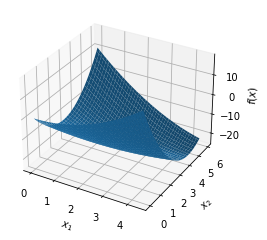

In [32]:
# Let's plot the function in 3D, as follows:
fig = plt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[x_1_min:x_1_max:0.1,x_2_min:x_2_max:0.1]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

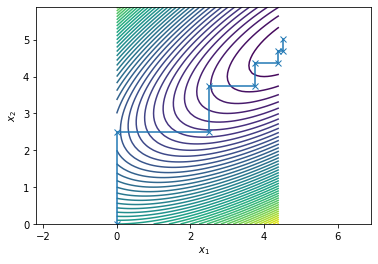

In [33]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(it_array.T[0], it_array.T[1], "x-")

In [34]:
print(guesses)

[array([0, 0]), array([0.        , 2.49999999]), array([2.5       , 2.50000001]), array([2.5       , 3.74999998]), array([3.75000007, 3.75000002]), array([3.75000005, 4.37500004]), array([4.37499998, 4.375     ]), array([4.37499999, 4.6875    ]), array([4.5       , 4.68749999]), array([4.5       , 5.01250002])]
